In [9]:
"""Python WPS execute"""
from owslib.wps import WebProcessingService, monitorExecution, printInputOutput
from os import system

In [ ]:
#import owslib
#owslib.__version__ # version must be >=0.10.3

In [10]:
wps_url = "http://localhost:8093/wps"
#wps_url = "http://birdhouse-lsce.extra.cea.fr:8093/wps"
wps = WebProcessingService(url=wps_url, verbose=False)

#wps = WebProcessingService(url="http://birdhouse-lsce.extra.cea.fr:8093/wps", verbose=False)
#wps_url = WebProcessingService(url="http://localhost:8093/wps", verbose=False)

In [11]:
print wps.identification.title

Flyingpigeon


In [12]:
for process in wps.processes:
    print '%s : \t %s' % (process.identifier, process.abstract)

visualisation : 	 Just testing a nice script to visualise some variables
extractpoints : 	 Extract Timeseries for specified coordinates from grid data
subset_countries : 	 This process returns only the given polygon from input netCDF files.
eobs_to_cordex : 	 downloads EOBS data in adaped CORDEX format
ensembleRobustness : 	 Calculates the robustness as the ratio of noise to signal in an ensemle of timeseries


In [13]:
p = wps.describeprocess(identifier='ensembleRobustness')
for input in p.dataInputs:
    printInputOutput(input)

 identifier=resource, title=NetCDF Files, abstract=NetCDF Files, data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=1, maxOccurs=100
 identifier=start, title=Start Year, abstract=Beginn of the analysed period (e.g 1971; if not set, the first consistend year of the ensemble will be taken), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: 1971 
 minOccurs=0, maxOccurs=1
 identifier=end, title=End Year, abstract=End of the analysed period (e.g. 2050 if not set, the last consistend year of the ensemble will be taken), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: 2005 
 minOccurs=0, maxOccurs=1
 identifier=timeslice, title=Time slice, abstract=Time slice (in years) for robustness reference (default=10)), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: 10 
 m

In [14]:
files = []

for i in range(1,16): # 
    #files.append('file:///home/estimr1/EUCLEIA/indices/RX5day/DJF/RX5day_DJF_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))
    files.append('file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))
    #files.append('file:///home/nils/data/indices/TG_yr_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))

In [15]:
from os.path import join

execute = wps.execute(
    identifier="ensembleRobustness", #indices_clipping",
    inputs=[
       ("resource",files[0]),
       ("resource",files[1]),
     #  ("resource",files[2]),
     #  ("resource",files[3]),
     #  ("resource",files[4]),
     #  ("resource",files[5]),
     #  ("resource",files[6]),
     #  ("resource",files[7]),
     #  ("resource",files[8]),
     #  ("resource",files[9]),
     #  ("resource",files[10]),
     #  ("resource",files[11]),
     #  ("resource",files[12]),
     #  ("resource",files[13]),
     #  ("resource",files[14])
           ])

monitorExecution(execute, sleepSecs=5)
print execute.getStatus()

for o in execute.processOutputs:
    print o.reference    

ERROR:owslib:Error: code=NoApplicableCode, locator=None, text=Failed to execute WPS process [ensembleRobustness]: global name 'start1' is not defined


 owslib.wps.WPSException : {'locator': 'None', 'code': 'NoApplicableCode', 'text': "Failed to execute WPS process [ensembleRobustness]: global name 'start1' is not defined"}
ProcessFailed


In [ ]:
from flyingpigeon.ensembleRobustness import worker

In [5]:
from cdo import Cdo
cdo = Cdo()
cdo.forceOutput = True 
  

In [19]:
files = []

for i in range(1,16): # 
    files.append('/home/estimr1/EUCLEIA/indices/TG/DJF/TG_DJF_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))

signal, low_agreement_mask, high_agreement_mask, graphic = worker(resource=files, start=None, end=None, timeslice=20, variable=None)

from IPython.display import Image
Image(filename=graphic)

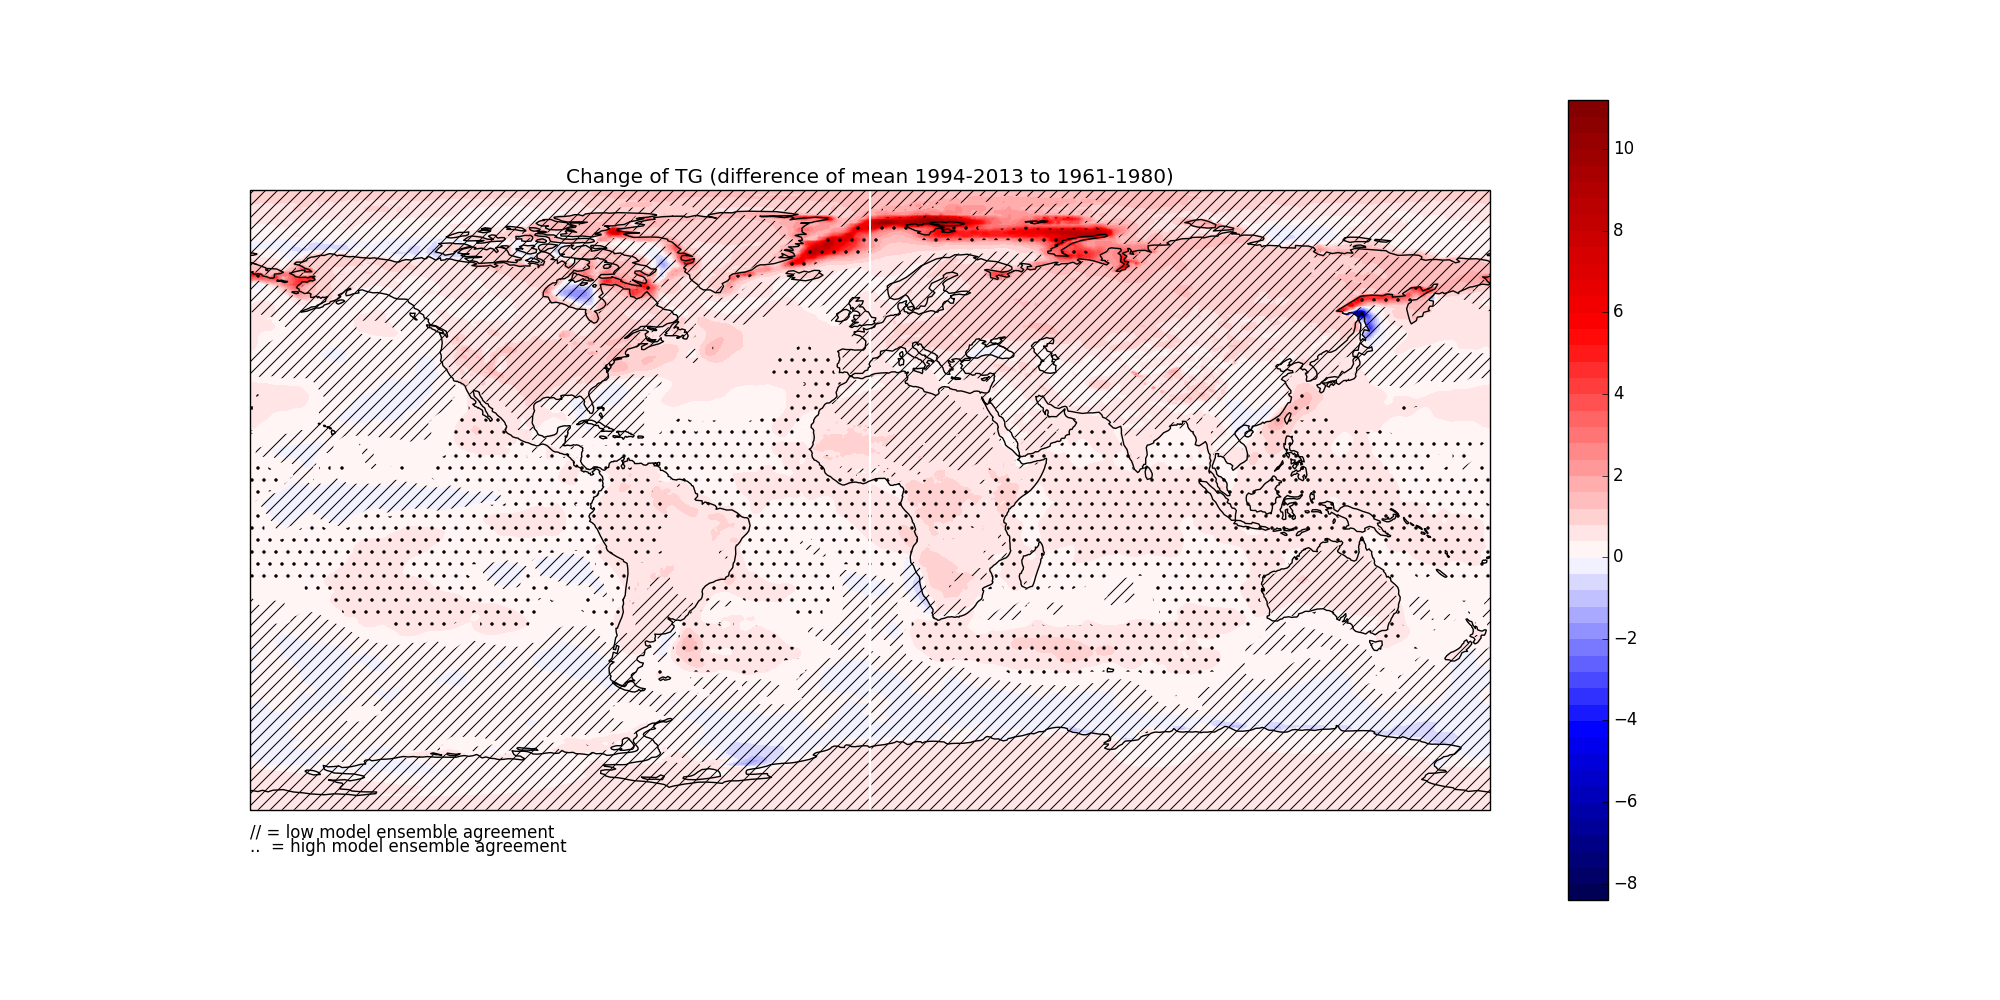

In [ ]:
sync_req_url = "{wps_url}?" +\
    "request=Execute" +\
    "&service=WPS" +\
    "&version=1.0.0" +\
    "&identifier=ensembleRobustness" +\
    "&DataInputs=resource={resource1};resource={resource2}" +\
    "&storeExecuteResponse=false" +\
    "&status=false"

In [ ]:
url=sync_req_url.format(
    wps_url=wps_url,
    resource1=files[0],
    resource2=files[1],)
print url   

In [ ]:
import requests

In [ ]:
r = ''
for i in range(1,16):
    r= '%sresource={resource%s};' % (r,i)
print r    

In [ ]:
async_req_url = "{wps_url}?" +\
    "request=Execute" +\
    "&service=WPS" +\
    "&version=1.0.0" +\
    "&identifier=ensembleRobustness" +\
    "&DataInputs="+r+\
    "&storeExecuteResponse=true" +\
    "&status=true"

In [ ]:
url=async_req_url.format(
    wps_url=wps_url,
    resource1=files[0],
    resource2=files[1],
    resource3=files[2],    
    resource4=files[3],
    resource5=files[4],
    resource6=files[5],
    resource7=files[6],
    resource8=files[7],
    resource9=files[8],
    resource10=files[9],
    resource11=files[10],
    resource12=files[11],
    resource13=files[12],
    resource14=files[13],
    resource15=files[14]
)
print url 

In [ ]:
r = requests.get(url)
from lxml import etree
from io import BytesIO
tree = etree.parse(BytesIO(r.content))
#print etree.tostring(tree)
status_url = tree.getroot().get("statusLocation")
print status_url

In [ ]:
r = requests.get(status_url)
print r.status_code
print r.text